In [30]:
#Importação dos pacotes necessários

import matplotlib.pyplot as plt # biblioteca de visualização de dados
import numpy as np # biblioteca para operações matemáticas multidimensionais
import pandas as pd # manipulação de dado em formato de dataframe
import seaborn as sns # biblioteca de visualização de informações estatísticas
import statsmodels.api as sm # biblioteca de modelagem estatística
import statsmodels.formula.api as smf

from math import log
from scipy import stats
from scipy.stats import pearsonr
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, recall_score, roc_curve, auc
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [31]:
# importação do dataframe e criação de uma copia
data = pd.read_csv("./data/modelo_step.csv")
df = data.copy()
df

,data,receita,mkt,fcl_binario
0,30/03/01,17057,-6653,0
1,30/06/01,18359,-4090,0
2,30/09/01,18878,-3444,0
3,30/12/01,21618,-6844,1
4,31/03/02,30527,-7938,1
...,...,...,...,...
85,30/06/22,7970141,-574960,1
86,30/09/22,7925589,-567954,1
87,31/12/22,7852053,-831610,1
88,31/03/23,8161503,-555362,1


In [32]:
# Normalização das variaveis
scaler = StandardScaler()
X = scaler.fit_transform(df[['receita', 'mkt']])

In [33]:
# inclusão das variaveis normalizadas no dataframe
df["receita_scaled"] = X[:,0]
df["mkt_scaled"] = X[:,1]
df

,data,receita,mkt,fcl_binario,receita_scaled,mkt_scaled
0,30/03/01,17057,-6653,0,-0.815585,0.898690
1,30/06/01,18359,-4090,0,-0.815082,0.909245
2,30/09/01,18878,-3444,0,-0.814882,0.911905
3,30/12/01,21618,-6844,1,-0.813824,0.897904
4,31/03/02,30527,-7938,1,-0.810385,0.893398
...,...,...,...,...,...,...
85,30/06/22,7970141,-574960,1,2.254267,-1.441640
86,30/09/22,7925589,-567954,1,2.237070,-1.412788
87,31/12/22,7852053,-831610,1,2.208686,-2.498543
88,31/03/23,8161503,-555362,1,2.328132,-1.360934


In [34]:
# Separacao das variaveis normalizadas em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(df[['receita', 'mkt']], df[['fcl_binario']], test_size=0.2, random_state=42)

In [35]:
# Separação do dataframe em trinamento e teste dos dataframes 
df_train = df[df.index.isin(X_train.index)]
df_test = df[df.index.isin(X_test.index)]

### Estimando um modelo múltiplo com as variáveis do dataset 'train' SCALED

In [72]:
np.exp(6.8134), np.exp(7.9493)

(909.9594153501191, 2833.590742562969)

In [74]:
np.exp(7.9493)/np.exp(6.8134)

3.1139748594971204

In [76]:
np.exp(0.00003274) / np.exp(0.00000263)

1.0000301104533107

In [70]:
modelo = smf.glm(formula="fcl_binario ~ receita + mkt", data=df_train, family=sm.families.Binomial()).fit()

In [71]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            fcl_binario   No. Observations:                   72
Model:                            GLM   Df Residuals:                       69
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -31.605
Date:                Mon, 23 Oct 2023   Deviance:                       63.209
Time:                        12:45:00   Pearson chi2:                     148.
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3678
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9535      0.515      3.797      0.000       0.945       2.962
receita      2.63e-06   9.56e-07      2.751      0.006    7.56e-07     4.5e-06
mkt         3.274e-05   1.11e-05      2.957      0.003     1.1e-05    5.44e-05
==============================================================================
"""

In [36]:
# Estimação do modelo logístico binário utilizando as variaveis de treinamento
modelo_scaled = smf.glm(formula="fcl_binario ~ receita_scaled + mkt_scaled", data=df_train, family=sm.families.Binomial()).fit()

In [37]:
# Parametros do Modelo
modelo_scaled.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            fcl_binario   No. Observations:                   72
Model:                            GLM   Df Residuals:                       69
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -31.605
Date:                Mon, 23 Oct 2023   Deviance:                       63.209
Time:                        12:34:44   Pearson chi2:                     148.
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3678
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.1935      0.375      0.517      0.605      -0.541       0.928
receita_scaled     6.8134      2.477      2.751      0.006       1.958      11.668
mkt_scaled         7.9493      2.688      2.957      0.003       2.681      13.218
==================================================================================
"""

In [38]:
# Estimação do modelo nulo
modelo_nulo = smf.glm(formula='fcl_binario ~ 1', data=df_train, family=sm.families.Binomial()).fit()
# Parametros do modelo nulo
modelo_nulo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            fcl_binario   No. Observations:                   72
Model:                            GLM   Df Residuals:                       71
Model Family:                Binomial   Df Model:                            0
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -48.114
Date:                Mon, 23 Oct 2023   Deviance:                       96.228
Time:                        12:34:45   Pearson chi2:                     72.0
No. Iterations:                     4   Pseudo R-squ. (CS):         -2.220e-16
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4520      0.242      1.870      0.062      -0.022       0.926
==============================================================================
"""

In [39]:
# Calculo do chi2
chi2_scaled = -2 * (modelo_nulo.llf - modelo_scaled.llf)
chi2_scaled

33.018408343109705

In [40]:
# Calculo do p_value do chi2
p_chi2_scaled = 1 - stats.chi2.cdf(chi2_scaled, 2)
p_chi2_scaled

6.763067583737126e-08

Pelo menos 1 beta estatisticamente significante

In [41]:
# Calculo AIC(Akaike Info Criterion)
# K=2 (quantidade betas)
AIC_scaled = -2 * modelo_scaled.llf + 2*(2+1)
AIC_scaled

69.20937244058388

In [42]:
# Calculo BIC (Bayesian Info Criterion)
# n=72 (tamanho da amostra)
BIC_scaled = -2 * modelo_scaled.llf + (2+1)*log(72)
BIC_scaled

76.03937079763203

### Previsao com as variaveis do Teste

In [43]:
df_train.head()

,data,receita,mkt,fcl_binario,receita_scaled,mkt_scaled
1,30/06/01,18359,-4090,0,-0.815082,0.909245
2,30/09/01,18878,-3444,0,-0.814882,0.911905
3,30/12/01,21618,-6844,1,-0.813824,0.897904
5,30/06/02,36360,-8054,1,-0.808134,0.892921
6,30/09/02,40731,-9299,1,-0.806447,0.887794


In [44]:
df_test.head(5)

,data,receita,mkt,fcl_binario,receita_scaled,mkt_scaled
0,30/03/01,17057,-6653,0,-0.815585,0.898690
4,31/03/02,30527,-7938,1,-0.810385,0.893398
10,30/09/03,72202,-12183,1,-0.794299,0.875917
12,31/03/04,100370,-26693,1,-0.783426,0.816164
18,30/09/05,174317,-32867,1,-0.754883,0.790739


In [45]:
# Ordenando df_test pelo index original
index_order = [40, 22, 55, 70, 0, 26, 39, 65, 10, 44, 81, 35, 56, 86, 12, 4, 18, 28]
df_test = df_test.reindex(index_order)

In [46]:
# criando um dataset df_test_scaled para fins de predição
df_test_scaled = df_test[["receita_scaled", "mkt_scaled", "fcl_binario"]]
df_test_scaled = df_test_scaled.reindex(index_order)

In [47]:
# Adicionando os valores previstos de probabilidade na base de dados
y_pred = []
for i in range(df_test.shape[0]):
    y = modelo_scaled.predict(df_test_scaled.iloc[i, 0:2])
    y_pred.append(y)
y_pred = np.array(y_pred)
df_test["phat_regressao"] = y_pred

In [48]:
df_test

,data,receita,mkt,fcl_binario,receita_scaled,mkt_scaled,phat_regressao
40,31/03/11,718553,-99595,1,-0.544811,0.515948,0.641746
22,30/09/06,255950,-59367,1,-0.723373,0.681610,0.664460
55,31/12/14,1484728,-203671,0,-0.249071,0.087356,0.308087
70,30/09/18,3999374,-510330,0,0.721570,-1.175489,0.014281
0,30/03/01,17057,-6653,0,-0.815585,0.898690,0.855771
26,30/09/07,293972,-49166,1,-0.708697,0.723618,0.753463
39,31/12/10,595922,-62849,1,-0.592146,0.667271,0.812045
65,30/06/17,2785464,-311160,0,0.253007,-0.355292,0.287621
10,30/09/03,72202,-12183,1,-0.794299,0.875917,0.851270
44,31/03/12,869791,-129928,1,-0.486434,0.391035,0.496930


In [49]:
# Construção de função para a definição da matriz de confusão

from sklearn.metrics import confusion_matrix, accuracy_score,\
    ConfusionMatrixDisplay, recall_score

def matriz_confusao(observado,predicts,cutoff):
    
    values = predicts.values
    
    predicao_binaria = []
    
    for item in values:
        if item >= cutoff:
            predicao_binaria.append(1)
        else:
            predicao_binaria.append(0)
    
    cm = confusion_matrix(observado, predicao_binaria)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()
    
    sensitividade = recall_score(observado, predicao_binaria, pos_label=1)
    especificidade = recall_score(observado, predicao_binaria, pos_label=0)
    acuracia = accuracy_score(observado, predicao_binaria)

    #Visualizando os principais indicadores desta matriz de confusão
    indicadores = pd.DataFrame({'Sensitividade':[sensitividade],
                                'Especificidade':[especificidade],
                                'Acurácia':[acuracia]})
    return indicadores

In [50]:
# Construção da matriz de confusão
cutoff = 0.5
df_test["pred_regressao"] = np.where(df_test["phat_regressao"]>=cutoff, 1, 0)
tn, fp, fn, tp = confusion_matrix(df_test['fcl_binario'], df_test["pred_regressao"]).ravel()
matriz_de_confusao = pd.DataFrame([[tp, fp], [fn, tn]],
                  index=['Verdadeiro', 'falso'],
                  columns=['Verdadeiro', 'Falso'])
matriz_de_confusao = matriz_de_confusao.rename_axis(index="Previsto", columns="Real")

In [51]:
matriz_de_confusao

Real,Verdadeiro,Falso
Previsto,,
Verdadeiro,11,2
falso,1,4


In [52]:
# Principais indicadores desta matriz de confusão
sensitividade = recall_score(df_test['fcl_binario'], df_test["pred_regressao"], pos_label=1)
especificidade = recall_score(df_test['fcl_binario'], df_test["pred_regressao"], pos_label=0)
acuracia = accuracy_score(df_test['fcl_binario'], df_test["pred_regressao"])
indicadores = pd.DataFrame({'Sensitividade':[sensitividade],
                                'Especificidade':[especificidade],
                                'Acurácia':[acuracia]})

In [53]:
indicadores

,Sensitividade,Especificidade,Acurácia
0,0.916667,0.666667,0.833333


In [54]:
#Igualando critérios de especificidade e de sensitividade

def espec_sens(observado,predicts):
    
    # adicionar objeto com os valores dos predicts
    values = predicts.values
    
    # range dos cutoffs a serem analisados em steps de 0.01
    cutoffs = np.arange(0,1.01,0.01)
    
    # Listas que receberão os resultados de especificidade e sensitividade
    lista_sensitividade = []
    lista_especificidade = []
    
    for cutoff in cutoffs:
        
        predicao_binaria = []
        
        # Definindo resultado binário de acordo com o predict
        for item in values:
            if item >= cutoff:
                predicao_binaria.append(1)
            else:
                predicao_binaria.append(0)
                
        # Cálculo da sensitividade e especificidade no cutoff
        sensitividade = recall_score(observado, predicao_binaria, pos_label=1)
        especificidadee = recall_score(observado, predicao_binaria, pos_label=0)
        
        # Adicionar valores nas listas
        lista_sensitividade.append(sensitividade)
        lista_especificidade.append(especificidadee)
        
    # Criar dataframe com os resultados nos seus respectivos cutoffs
    resultado = pd.DataFrame({'cutoffs':cutoffs,'sensitividade':lista_sensitividade,'especificidade':lista_especificidade})
    return resultado

In [55]:
#Especificidade' e 'cutoffs'. Assim, Criação de um dataframe que contém: 'sensitividade', 'especificidade' e 'cutoffs'

dados_plotagem = espec_sens(observado = df_test['fcl_binario'],
                            predicts = df_test['phat_regressao'])

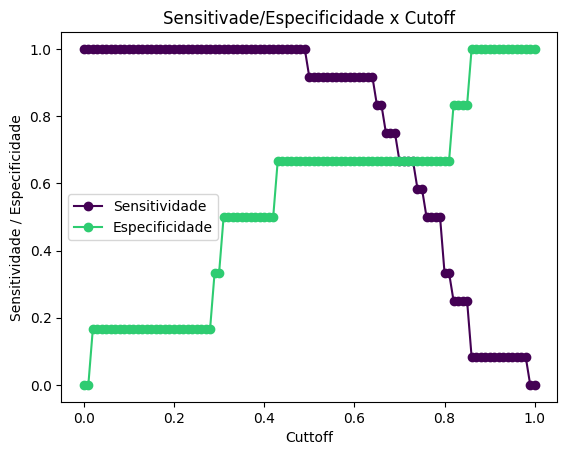

In [87]:
#Visualizando o novo dataframe 'dados_plotagem' e plotando os dados
#em um gráfico que mostra a variação da especificidade e da sensitividade
#em função do cutoff

#plt.figure(figsize=(10,10))
plt.plot(dados_plotagem.cutoffs,dados_plotagem.sensitividade, '-o',
         color="#440154FF")
plt.plot(dados_plotagem.cutoffs,dados_plotagem.especificidade, '-o',
         color="#2ecc71")
plt.legend(['Sensitividade', 'Especificidade'])
plt.xlabel("Cuttoff")
plt.ylabel("Sensitividade / Especificidade")
plt.title("Sensitivade/Especificidade x Cutoff")
plt.show()

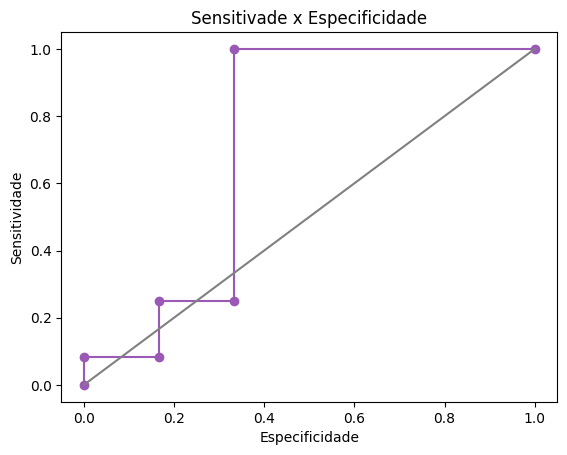

In [84]:
# Construção da curva ROC
#Função 'roc_curve' do pacote 'metrics' do sklearn
fpr, tpr, thresholds =roc_curve(df_test['fcl_binario'],df_test['phat_regressao'])
roc_auc = auc(fpr, tpr)

#Cálculo do coeficiente de GINI
gini = (roc_auc - 0.5)/(0.5)

#Plotando a curva ROC
#plt.figure(figsize=(10,10))
plt.plot(fpr,tpr, '-o', color="#9b59b6")
plt.plot(fpr,fpr, color='gray')
plt.title("Sensitivade x Especificidade")
#plt.title("Área abaixo da curva: %f" % roc_auc +
          #" | Coeficiente de GINI: %f" % gini, fontsize=17)
plt.xlabel("Especificidade")
plt.ylabel("Sensitividade")
plt.show()

In [58]:
df_train.to_csv("./data/train.csv", index = False)
df_test.to_csv("./data/test.csv", index = False)
df.to_csv("./data/df.csv", index = False)